<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/KFold_CrossValidation_and_Evaluation_for_Classification_Using_ScikitLearn_with_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load built-in digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [2]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Validation curve for SVM gamma
param_range = np.logspace(-6, -1, 5)
train_scores, val_scores = validation_curve(SVC(), X_train, y_train, param_name='gamma', param_range=param_range, cv=3)

In [4]:
# Train final model with best param (example)
best_gamma = param_range[np.argmax(np.mean(val_scores, axis=1))]
model = SVC(gamma=best_gamma)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Prints
print("Validation Train Scores Mean:", np.mean(train_scores, axis=1))
print("Validation Scores Mean:", np.mean(val_scores, axis=1))
print("Test Accuracy with Best Gamma:", accuracy_score(y_test, y_pred))

Validation Train Scores Mean: [0.10716771 0.93215031 0.99234516 1.         1.        ]
Validation Scores Mean: [0.10716771 0.91927627 0.97842728 0.92275574 0.10716771]
Test Accuracy with Best Gamma: 0.9861111111111112


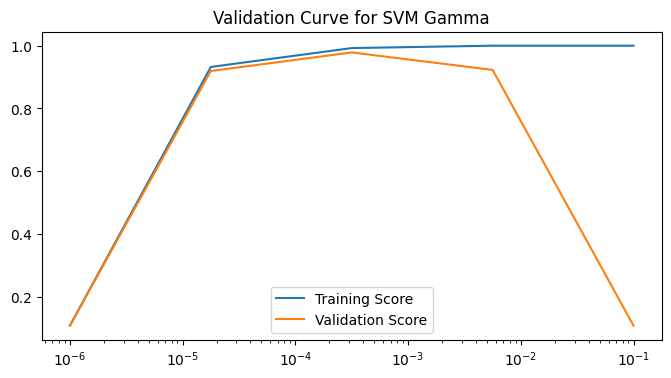

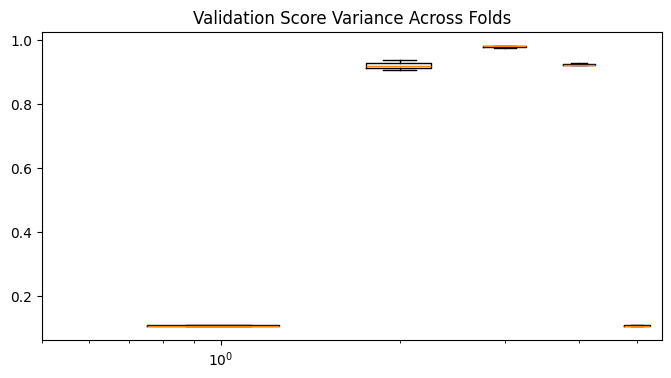

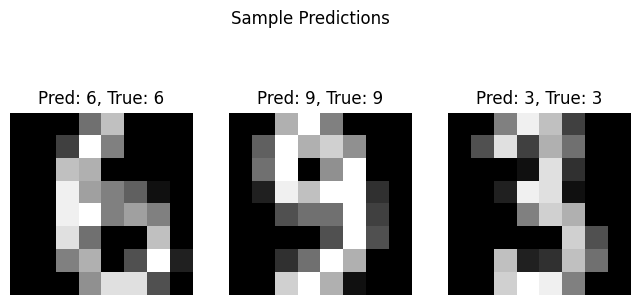

In [5]:
# Visual 1: Validation Curve
plt.figure(figsize=(8, 4))
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.semilogx(param_range, np.mean(val_scores, axis=1), label='Validation Score')
plt.title('Validation Curve for SVM Gamma')
plt.legend()
plt.show()

# Visual 2: Score Variance Box Plot
plt.figure(figsize=(8, 4))
plt.boxplot(val_scores.T)
plt.semilogx()
plt.title('Validation Score Variance Across Folds')
plt.show()

# Visual 3: Sample Digit Images with Predictions
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Pred: {y_pred[i]}, True: {y_test[i]}')
    ax.axis('off')
plt.suptitle('Sample Predictions')
plt.show()